In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score ,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

MSE:1.0005061034646707
r2_score:0.8913615765952445


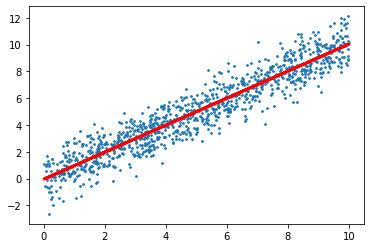

In [5]:
x = np.random.rand(1000)*10
y = x + np.random.randn(1000)
plt.scatter(x,y,s=3)
x = x.reshape(-1,1)


lr =LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_pred = lr.predict(x)
plt.plot(x,y_pred,'r',lw=3)
print(f'MSE:{mean_squared_error(y,y_pred)}')#mean_squared_error 是均方誤差
print(f'r2_score:{r2_score(y,y_pred)}')#r2_score 

MSE:9.752099939083019
r2_score:0.0175865444919866


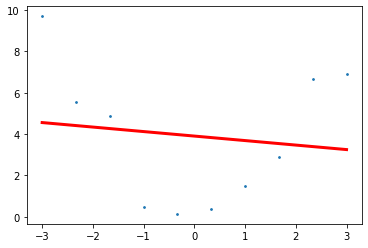

In [6]:
x = np.linspace(-3, 3, 10)
y = x**2 + np.random.randn(10)
plt.scatter(x,y,s=3)
x = np.reshape(x,(-1,1))

lr =LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_pred = lr.predict(x)
plt.plot(x,y_pred,'r',lw=3)
print(f'MSE:{mean_squared_error(y,y_pred)}')#mean_squared_error 是均方誤差
print(f'r2_score:{r2_score(y,y_pred)}')#r2_score 



In [7]:
poly = PolynomialFeatures(degree=2,include_bias=False)#PolynomialFeatures這用於生成多項式 degree=2
x2 = poly.fit_transform(x)
print(x2.shape)


(10, 2)


MSE:0.8576551982873859
r2_score:0.9136009667407954


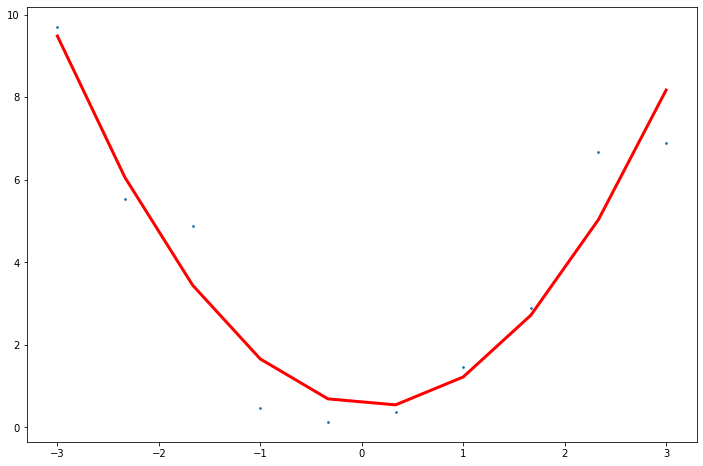

In [8]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,s=3)
lr =LinearRegression()
lr.fit(x2,y)
y_pred = lr.predict(x2)

x=x.reshape(-1,1)
xp=np.linspace(-5,5,10)
xp=xp.reshape(-1,1)
lr =LinearRegression()

# for d in range(1,8,2):
#     poly = PolynomialFeatures(degree=d,include_bias=False)
#     xd = poly.fit_transform(x)
#     lr.fit(xd,y)
#     xpd = poly.fit_transform(xp)
#     y_pred= lr.predict(xpd)
#     plt.plot(xp,y_pred,label=f'{d}-degree')
# plt.legend()


plt.plot(x,y_pred,'r',lw=3)
print(f'MSE:{mean_squared_error(y,y_pred)}')#mean_squared_error 是均方誤差
print(f'r2_score:{r2_score(y,y_pred)}')#r2_score 


1-degree
r2-score of Training set : 0.9608237163762756
r2-score of Testing set : 0.8722977118164129
3-degree
r2-score of Training set : 0.9701545966619851
r2-score of Testing set : 0.8553090233770458
5-degree
r2-score of Training set : 0.978229166175743
r2-score of Testing set : 0.8312303307299588
7-degree
r2-score of Training set : 0.9798099436843
r2-score of Testing set : 0.8342477835060105
9-degree
r2-score of Training set : 1.0
r2-score of Testing set : 0.6590135268202242


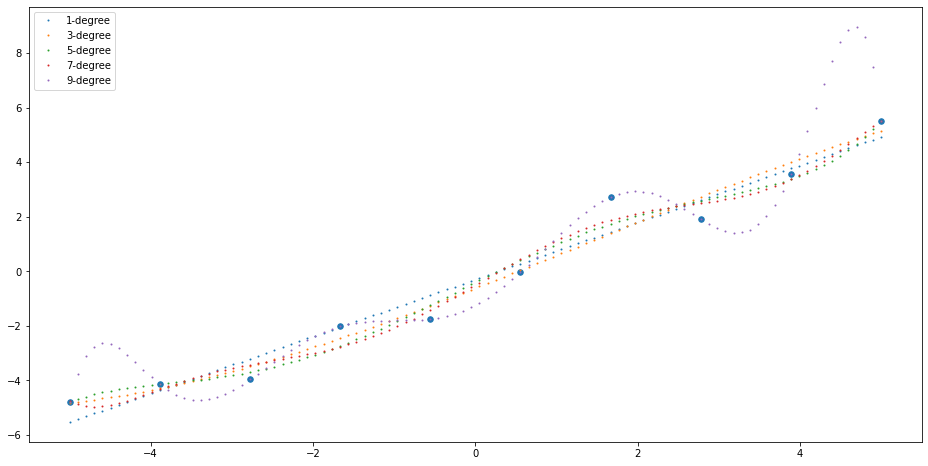

In [9]:

fig = plt.figure(figsize=(16,8))

x_train = np.linspace(-5,5,10)
y_train = x_train + np.random.randn(10)
plt.scatter(x_train, y_train, s=30)

x_train = x_train.reshape(-1,1)

x_test = np.linspace(-5, 5, 100)
y_test = x_test + np.random.randn(100)
x_test = x_test.reshape(-1,1)

lr = LinearRegression()
for d in range(1, 11, 2): #[1, 3, 5, 7, 9] range(start, stop, step)
    poly = PolynomialFeatures(degree=d, include_bias=False)
    x_train_deg = poly.fit_transform(x_train)
    x_test_deg = poly.fit_transform(x_test)

    lr.fit(x_train_deg, y_train)    
    y_pred = lr.predict(x_test_deg)
    yt_pred = lr.predict(x_train_deg)

    plt.plot(x_test, y_pred, 'o', markersize=1, label=f'{d}-degree')
    print(f'{d}-degree')       
    print(f'r2-score of Training set : {r2_score(y_train, yt_pred)}')
    print(f'r2-score of Testing set : {r2_score(y_test, y_pred)}')
plt.legend()



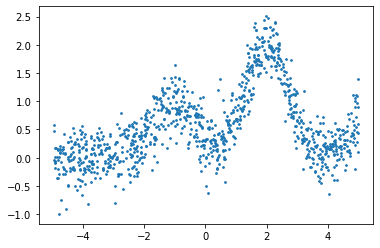

In [23]:
x = np.random.rand(1000)*10-5
x = np.sort(x)
y = np.exp(-(x+1)**2) + 2*np.exp(-(x-2)**2) + np.random.randn(1000)*0.3 +2*np.exp(-(x-6)**2)
plt.scatter(x,y,s=3)
x=x.reshape(-1,1)


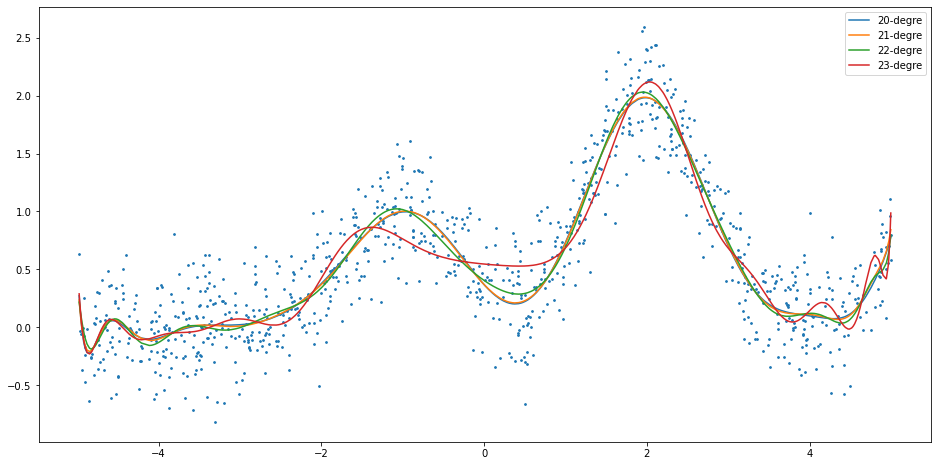

In [11]:
fig = plt.figure(figsize=(16,8))
plt.scatter(x,y,s=3)
lr =LinearRegression()
for d in range(20,24,1):
    poly = PolynomialFeatures(degree=d,include_bias=False)
    xd =poly.fit_transform(x)
    lr.fit(xd, y)
    y_pred = lr.predict(xd)
    plt.plot(x ,y_pred,label=f'{d}-degre')
plt.legend()


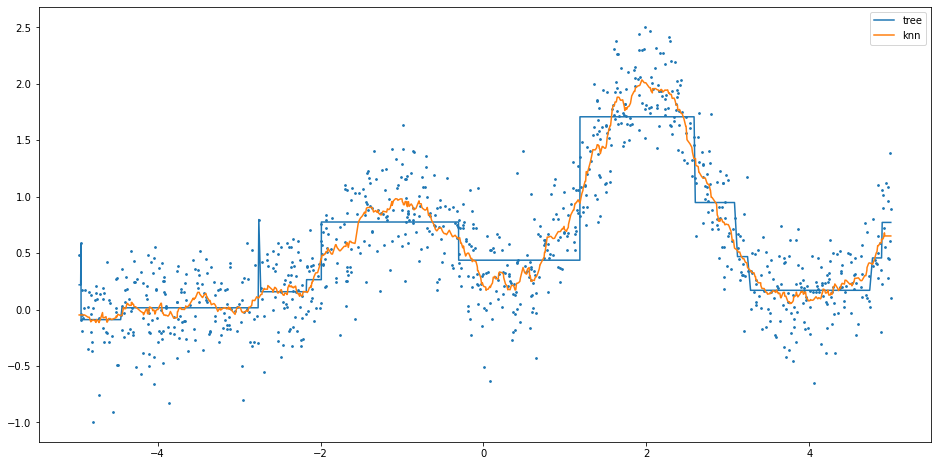

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


fig = plt.figure(figsize=(16,8))
plt.scatter(x,y,s=3)
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(x,y)
y_pred = tree.predict(x)
plt.plot(x,y_pred,label='tree')

knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x,y)
y_pred = knn.predict(x)
plt.plot(x,y_pred,label='knn')

plt.legend()




In [26]:
from sklearn.model_selection import GridSearchCV

tree_params={'max_depth':range(3,21,1)} #用字典方式，設定max_depth的參數，由3次到21次，每次加1。
tree_grid = GridSearchCV(tree, param_grid=tree_params, cv=5 ,n_jobs=-1)
#設定tree_grid模式測試參數，cv:把資料分成5份，4份作訓練、1份作比對，n_jos=-1設定多核CUP運作方式，-1表依機器設定

tree_grid.fit(x,y) #帶入訓練資料
print(f'Best Params is{tree_grid.best_params_}') #印出測試後的到最佳參數
print(f'Best Score is{tree_grid.best_score_}') #印出測試後的到最佳分數

Best Params is{'max_depth': 16}
Best Score is-1.116129285922653
